In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import time
import seaborn as sns
import matplotlib.patheffects as PathEffects
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,rc={"lines.linewidth": 2.5})
time_start = time.time()

In [2]:
file = open("NDE.csv", "r")
next(file)
NDE_Dict = {}
n = 0

for row in file:
    i,date,d = row.split(",")
    i = i[1:len(i)-1]
    if i in NDE_Dict.keys():
        _,D = d.split(":")
        y,_,_ = date.split('-')
        y = int(y[1:])
        NDE_Dict[i].append((y,float(D[1:4])))
    else:
        _,D = d.split(":")
        D,_ = D.split(".")
        y,_,_ = date.split('-')
        y = int(y[1:])
        NDE_Dict[i] = [(y,float(D[1:4]))]
        

file.close()
n = 0
for i in NDE_Dict.items():
    print(i,"\n")
    n += 1
    if n == 10:
        break
        
%store NDE_Dict

('00017f58-baec-51fd-9a90-e2acae968457', [(1997, 0.0), (1996, 0.9), (1995, 1.2)]) 

('0001e381-e787-576d-8183-56e0f5f4a895', [(2007, 1.0), (2006, 0.1), (2005, 0.8)]) 

('00023c5a-004b-53a9-b57f-fca73cca257f', [(2005, 6.0), (2004, 7.4), (2003, 7.2), (2002, 7.4), (2001, 6.4), (2000, 5.5), (1999, 5.6), (1998, 3.3), (1997, 2.5), (1996, 2.6), (1995, 5.7)]) 

('0004b29e-62ba-5f86-b3d5-4dcf0bd553b1', [(2020, 4.0), (2019, 11.0), (2018, 31.0), (2017, 20.0), (2016, 2.0), (2015, 2.8), (2014, 5.5), (2013, 6.7), (2012, 11.0), (2011, -7.0), (2010, -2.0), (2009, -2.0), (2008, -0.0), (2007, 17.0), (2006, 1.8), (2005, 0.8), (2004, 1.1), (2003, 4.8), (2002, 4.6), (2001, 2.1), (2000, 2.0), (1999, 3.2), (1998, 2.6), (1997, 2.7)]) 

('000a6285-b1d9-5767-9a9e-dc9b370fbb89', [(2020, 2.0), (2019, 2.6), (2018, 3.3), (2017, 5.1), (2016, 3.1), (2015, 2.1), (2014, 1.1), (2013, 1.7), (2012, 1.3), (2011, 2.2), (2010, 1.7), (2009, 2.2), (2008, 1.7), (2007, 2.1), (2006, 2.4), (2005, 2.9), (2004, 1.7), (2003, 1.8), (2

In [3]:
file = open("TDE.csv", "r")
next(file)
TDE_Dict = {}
n = 0

for row in file:
    i,date,d, = row.split(",")
    i = i[1:len(i)-1]

    if i in TDE_Dict.keys():
        _,D = d.split(":")
        D,_ = D.split(".")
        y,_,_ = date.split('-')
        y = int(y[1:])
        TDE_Dict[i].append((y,int(D)))
    else:
        _,D = d.split(":")
        D,_ = D.split(".")
        y,_,_ = date.split('-')
        y = int(y[1:])
        TDE_Dict[i] = [(y,int(D))]

file.close()
n = 0
for i in TDE_Dict.items():
    print(i,"\n")
    n += 1
    if n == 10:
        break
        
%store TDE_Dict

('00017f58-baec-51fd-9a90-e2acae968457', [(1997, 18), (1996, 27), (1995, 30)]) 

('00023c5a-004b-53a9-b57f-fca73cca257f', [(2005, 241), (2004, 248), (2003, 237), (2002, 221), (2001, 209), (2000, 161), (1999, 126), (1998, 53), (1997, 39), (1996, 43), (1995, 138)]) 

('0004b29e-62ba-5f86-b3d5-4dcf0bd553b1', [(2020, 295), (2019, 415), (2018, 224), (2017, 154), (2016, 78), (2015, 91), (2014, 247), (2013, 270), (2012, 313), (2011, 264), (2010, 129), (2009, 69), (2008, 34), (2007, 25), (2006, 41), (2005, 28), (2004, 41), (2003, 93), (2002, 99), (2001, 93), (2000, 100), (1999, 181), (1998, 230), (1997, 248)]) 

('000a6285-b1d9-5767-9a9e-dc9b370fbb89', [(2020, 84), (2019, 152), (2018, 95), (2017, 112), (2016, 111), (2015, 87), (2014, 38), (2013, 47), (2012, 37), (2011, 57), (2010, 49), (2009, 54), (2008, 91), (2007, 112), (2006, 132), (2005, 180), (2004, 610), (2003, -2261), (2002, -441), (2001, -234), (2000, -265), (1999, 124), (1998, 149), (1997, 57), (1996, 54), (1995, 66), (1994, 96), (199

In [4]:
print(len(TDE_Dict))

23977


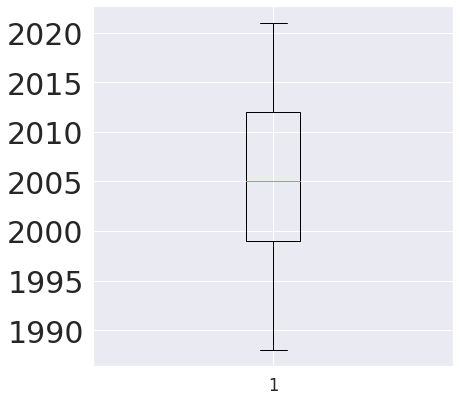

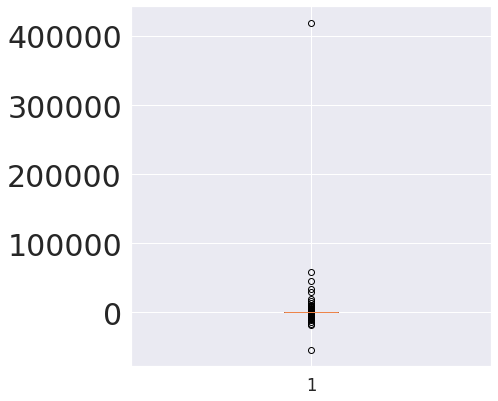

In [5]:
def Box_Plot(Dict):
    
    Year = []
    Single_Year = []
    Data = []
    Single_Data = []
    n = 0
    for i in Dict.values():
        entity_year = []
        entity_data = []
        for j in i:
            year,val = j
            entity_year.append(year)
            Single_Year.append(year)
            entity_data.append(val)
            Single_Data.append(val)
        
        Year.append(np.array(entity_year))
        Data.append(np.array(entity_data))
        
        n += 1
        if n == 500:
            
            fig = plt.figure(figsize =(5, 5))
            ax = fig.add_axes([0, 0, 1, 1])
            bp = ax.boxplot(Single_Year)
            plt.yticks(fontsize=30)
            plt.show()
            
            fig2 = plt.figure(figsize =(5, 5))
            ax2 = fig2.add_axes([0, 0, 1, 1])
            bp2 = ax2.boxplot(Single_Data)
            plt.yticks(fontsize=30)
            plt.show()
            
            break
            
Box_Plot(TDE_Dict)

In [6]:
def Get_Data(NDE_Dict):
    NDE_Year_Val_Dict = {}
    Year = []
    Data = []
    for i in NDE_Dict.items():
        ID,info = i
        year = []
        data = []
        for j in info:
            date,val = j
            year.append(date)
            data.append(val)

        Year.append([ID,year])
        Data.append([ID,data])

    ## Finding the Time Frame
    Data_Dict = {}
    n = 0
    X = []
    for i in range(len(Year)):
        n += 1
        if  all(x in Year[i][1] for x in list(range(2015,2020))):
            p = Year[i][1][0] - 2020
            q = p + 5
            if len(Data[i][1][p:q]) != 5:
                #print(Year[i])
                continue
            Data_Dict[Year[i][0]] = Data[i][1][p:q]
            X.append(Data[i][1][p:q])
            
    
    return X, Data_Dict

X_TDE, Data_Dict_TDE = Get_Data(TDE_Dict)
X_NDE, Data_Dict_NDE = Get_Data(NDE_Dict)
print(len(X_TDE))
print(len(X_NDE))

2879
3473


In [7]:
# TDE_Dict['0004b29e-62ba-5f86-b3d5-4dcf0bd553b1']
# NDE_Dict['"0004b29e-62ba-5f86-b3d5-4dcf0bd553b1"']

common = set(list(Data_Dict_TDE.keys())).intersection(list(Data_Dict_NDE.keys()))
%store common

Stored 'common' (set)


In [8]:
print(len(common))

2534


In [9]:
print(list(Data_Dict_TDE.items())[0])
print(list(Data_Dict_NDE.items())[0])

('0004b29e-62ba-5f86-b3d5-4dcf0bd553b1', [295, 415, 224, 154, 78])
('0004b29e-62ba-5f86-b3d5-4dcf0bd553b1', [4.0, 11.0, 31.0, 20.0, 2.0])
